In [22]:
#Importing Libraries
import numpy as np
import cvxpy as cp
import dccp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack as spfft
from PIL import Image
#Library to set themes
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

In [2]:
#Paths to numpy arrays
path = '/Users/kushagrakhatwani/MDS/Project1/Problem3/Group1' #Write your own path for the numpy arrays

#Array y that is incomplete representation of x
y = np.load(path+'/y.npy')
print("y_Shape:",y.shape)
y = y[:,np.newaxis]

# A inverse array 
A_inv = np.load(path+'/A_inv.npy')
print("A_inv_Shape:",A_inv.shape)

# matrix C for , y = Cs where s is the sparse representation
c = np.load(path+'/C.npy')
print("C_shape:",c.shape)
print(cp.installed_solvers())

y_Shape: (3000,)
A_inv_Shape: (10000, 10000)
C_shape: (3000, 10000)
['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']


In [3]:
#Convex Optimization using cvxpy solver
#This part can take 8-20 mins depending on your PC

#Variable declaration
s = cp.Variable((A_inv.shape[0],1))
#Objective function
f = cp.norm(s,1)
obj = cp.Minimize(f)
#Constraints
cnsts = [y == c@s]
#Problem declaration
prob = cp.Problem(obj,cnsts)
#To check if problem follows Disciplined convex programming rules
print(prob.is_dcp(prob))
#Finding optimal value using solve command
opt_val = prob.solve(verbose=True,solver='OSQP')
#Storing value of s for optimal value of the problem
sol = s.value

True
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Nov 10 10:29:04 PM: Your problem has 10000 variables, 1 constraints, and 0 parameters.
(CVXPY) Nov 10 10:29:04 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 10 10:29:04 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 10 10:29:04 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 10 10:29:04 PM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 10 10:29:04 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrix

In [4]:
#Defining inverse cosine transform;will be used later for reconstruction of the image
def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)
#x = sp.linalg.solve(A_inv,sol)

[[ 1.29113933e+04]
 [ 1.35990925e+03]
 [ 8.08190622e+02]
 ...
 [-2.26677832e-02]
 [-1.05957541e+01]
 [ 1.82304340e-02]]


In [5]:
#reshape s as 100X100 as initially columns were stacked into rows
s_reshape = np.reshape(sol,(100,100))
#Printing obtained shape
print(x_reshape.shape)
#Reconstruction of image
x = idct2(s_reshape.T)

(100, 100)


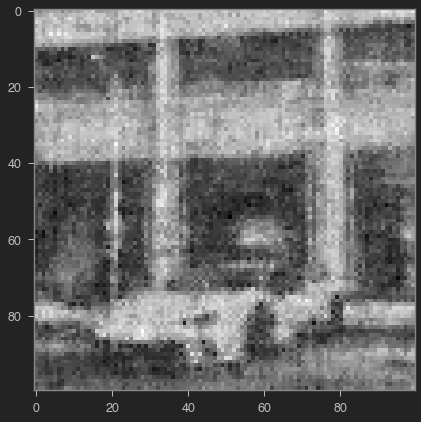

In [10]:
#Plotting reconstructed image and saving into directory
plt.imshow(x,cmap='gray')
plt.imsave('complete.png', x,cmap='gray')

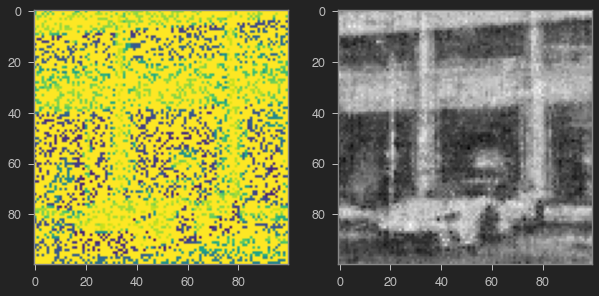

In [28]:
#Comparing with incomplete image
plt.figure(figsize = (10,10))
#Importing incomplete image
incom = Image.open(path+'/incomplete.png')
plt.subplot(1,2,1)
plt.imshow(incom)

plt.subplot(1,2,2)
plt.imshow(x,cmap='gray')